In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score,plot_roc_curve

In [12]:
C_P=pd.read_excel(r"C:\Users\lenovo\Downloads\P12-Churn-Modelling.xlsx")

In [13]:
C_P.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
C_P["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:>

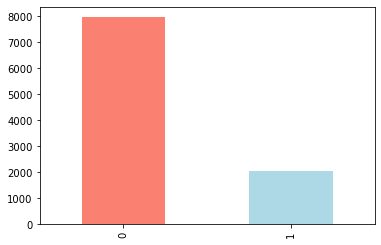

In [20]:
C_P["Exited"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [24]:
C_P.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Churn frequency according to Gender

In [25]:
pd.crosstab(C_P.Exited,C_P.Gender)

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


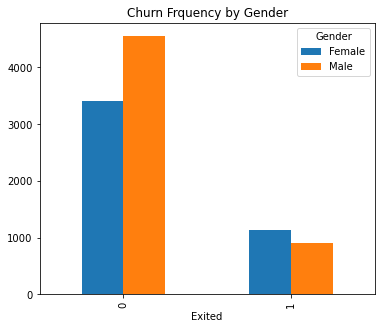

In [31]:
pd.crosstab(C_P.Exited,C_P.Gender).plot(kind="bar",figsize=(6,5))
plt.title("Churn Frquency by Gender")
plt.show()

(11.5, -0.5)

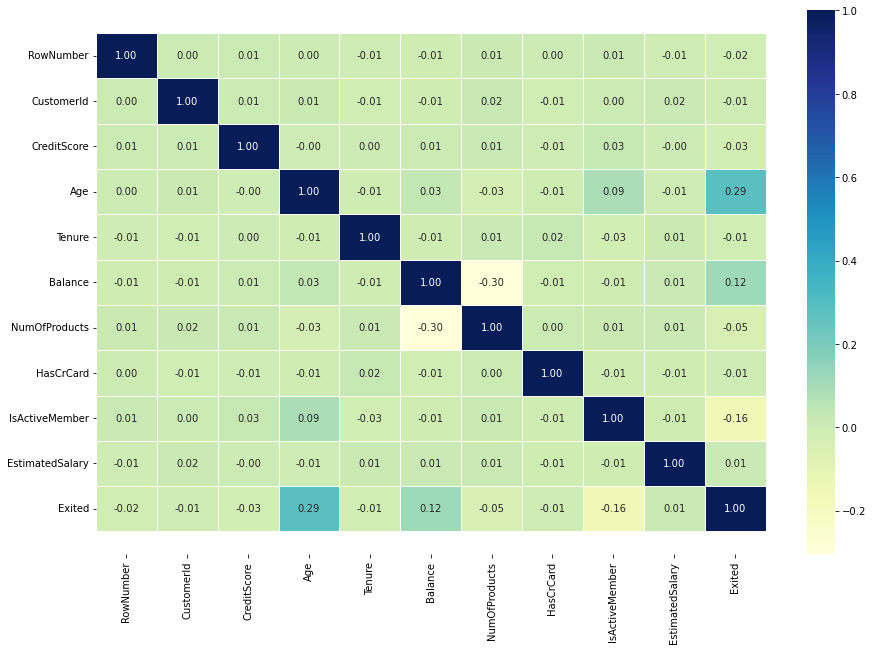

In [34]:
corr_matrix = C_P.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [35]:
C_P=pd.get_dummies(C_P,drop_first=True)

In [36]:
C_P.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0


In [39]:
x=C_P.drop(["Exited"],axis=1)
y=C_P["Exited"]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [42]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred=lr.predict(x_test)

In [47]:
accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
report=classification_report(y_test,y_pred)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
print(accuracy,"\n",confusion)

0.8053333333333333 
 [[2416    0]
 [ 584    0]]


In [52]:
print(report)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



In summary, a precision score of 0.81 for "Not Churn" means that the model correctly predicted 81% of the customers who did not churn out of all the customers that it predicted as not churning. A recall score of 1.00 for "Not Churn" means that the model correctly identified all the customers who did not churn out of all the customers that actually belong to the "Not Churn" class. Finally, an F1 score of 0.80 for "Not Churn" means that the model has a good balance between precision and recall for this class.

In [55]:
print('Accuracy: {:.2f}%'.format(accuracy*100))
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', report)

Accuracy: 80.53%
Confusion Matrix:
 [[2416    0]
 [ 584    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



In [62]:
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [70]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)

In [71]:
model_scores

{'Logistic Regression': 0.8053333333333333,
 'KNN': 0.7653333333333333,
 'Random Forest': 0.8576666666666667}

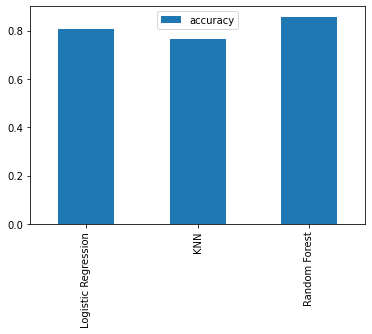

In [72]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [1]:

import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the pixel values of the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Define the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with an optimizer, loss function, and metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training dataset
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11490434/11490434 [==============================] - 40s 3us/step
Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2627 - accuracy: 0.9254
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1139 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0787 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0593 - accuracy: 0.9820
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0729 - accuracy: 0.9770
Test accuracy: 0.9769999980926514
